# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

# Step 1: Import Libraries

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


## Challenge 1
#I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

# Step 2: Create the DataFrame

In [12]:
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

In [13]:
# Display the DataFrame
print(student_data)

   Age  Tardies
0   17       10
1   51        1
2   27        5
3   21        9
4   36        4
5   48        2
6   19        9
7   26        6
8   54        0
9   30        3


# Step 3: Visualize the Data

 # #Draw a dispersion diagram (scatter plot) for the data.

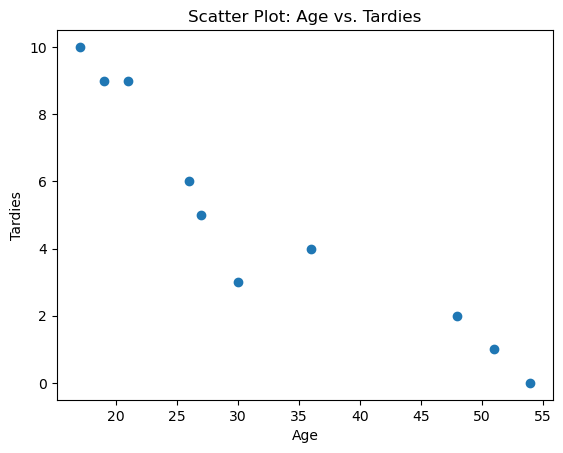

In [15]:
plt.scatter(student_data['Age'], student_data['Tardies'])
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Scatter Plot: Age vs. Tardies')
plt.show()


# #Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# We can see clearly from the scatter plot that as the age of students increases, the number of tardies decreases.
# younger students tend to have more tardies, while older students tend to have fewer tardies.
# Following hypotheses can be made about the relationship betwen age and number of tardies:
# 1)There seems to be an inverse (negative) relationship between a student's age and the number of tardies.
  #In other words, as students get older, they are less likely to be late to class.
# 2)The trend appears to be linear, meaning that the number of tardies decreases roughly linearly as age increases.


# Step 4: Calculate covariance and correlation

## Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [16]:
# Calculate covariance
covariance = student_data['Age'].cov(student_data['Tardies'])

# Calculate correlation
correlation = student_data['Age'].corr(student_data['Tardies'])

# Print results
print(f"Covariance between Age and Tardies: {covariance}")
print(f"Correlation between Age and Tardies: {correlation}")


Covariance between Age and Tardies: -45.56666666666666
Correlation between Age and Tardies: -0.9391626886887122


# Difference between covariance and correlation:
  #Covariance: Covariance measures the degree to which two variables change together. A positive covariance 
indicates that as one variable increases, the other tends to increase as well (positive relationship), while a
negative covariance indicates that as one variable increases, the other tends to decrease (negative relationship). 
The magnitude of covariance does not have a fixed range, so it's challenging to interpret the strength of the
relationship.

  #Correlation: Correlation is a standardized measure of the linear relationship between two variables.It provides a value between -1 and 1. A positive correlation value (close to 1) indicates a strong positive linear relationship,while a negative correlation value (close to -1) indicates a strong negative linear relationship. A correlation value close to 0 suggests a weak or no linear relationship. Correlation also considers the scale of the variables,making it easier to compare relationships.

# Now comparing their values we got.
 Covariance: The negative covariance value (-45.57) suggests that there is a negative relationship between a 
student's age and the number of tardies. As age increases, the number of tardies tends to decrease. 
The negative sign indicates an inverse relationship, which aligns with the observation from the scatter plot.

Correlation: The strong negative correlation value (-0.939) confirms the strong negative linear 
relationship between age and tardies. This indicates that there is a high degree of negative linear association 
between a student's age and the number of tardies. As age increases, students are increasingly less likely to be 
late to class.
# What do they tell us in this case?
It tells us that both covariance and correlation provide evidence supporting our initial hypothesis that younger students tend to be more often late to class. The correlation value of approximately -0.939 quantifies the 
strength of this negative relationship, indicating a strong association between age and tardiness.

# Step 5: Modelling


# 
We first create the model. This just tells python to be ready to use a linear model, it does not actually compute anything yet:

# Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [22]:
# Create and train the linear regression model
model = linear_model.LinearRegression()

# Train the data
Then we will split the data into the target data (y) and feature data (X) - this is typically called the X-y split:

In [24]:
X = student_data[['Age']]
y = student_data['Tardies']

In [26]:
# Fit model
result = model.fit(X, y)

print("Intercept:", result.intercept_)
print("Coefficient:", result.coef_)

Intercept: 12.888803363135768
Coefficient: [-0.24282077]


# #Plot your regression model on your scatter plot.

In [16]:

# Create a scatter plot
plt.scatter(student_data['Age'], student_data['Tardies'], label='Data Points')

# Predict tardies using the model
y_pred = model.predict(X)

# Plot the regression line
plt.plot(student_data['Age'], y_pred, color='red', linewidth=2, label='Regression Line')

# Labels and legend
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Regression Line: Age vs. Tardies')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

NameError: name 'student_data' is not defined

## Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

# Interpretation and Conclusions:

The linear regression analysis of the data suggests the following:

1. Negative Relationship: The negative coefficient of Age (-0.24282077) indicates that there is a negative linear relationship between a student's age and the number of tardies. In other words, as students get older, they tend to have fewer tardies.

2. Strong Correlation: The correlation coefficient between Age and Tardies is approximately -0.93916269, which is close to -1. This high negative correlation indicates a strong negative linear association between age and tardiness.

3. Regression Line: The red regression line on the scatter plot visually represents the negative linear relationship. It slopes downward, indicating that as age increases, the predicted number of tardies decreases.

Conclusions:
- Based on the analysis and visualization, we can conclude that there is a strong negative correlation and a clear negative linear relationship between a student's age and the number of tardies.
- The model suggests that age is a good predictor of tardiness in this dataset, as older students are less likely to be late to class.



## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [50]:
#Import the dataset
vehicles_df = pd.read_csv('vehicles.csv')
vehicles_df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [43]:
# List of variables
variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']

# Calculate the correlations
correlations = vehicles_df[variables].corrwith(vehicles_df['CO2 Emission Grams/Mile'])

# Print the correlations
print("Correlations with CO2 Emission Grams/Mile:")
print(correlations)


Correlations with CO2 Emission Grams/Mile:
Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
dtype: float64


# Interpret the correlations based on above :
Year: The correlation with 'CO2 Emission Grams/Mile' is showing low or negative here.

Cylinders: The correlation with 'CO2 Emission Grams/Mile' is showing positive.So vehicles with more cylinders is consuming more fuel and emitting more CO2.

Fuel Barrels/Year: This variable is showing a strong positive correlation with 'CO2 Emission Grams/Mile.'(because corrr is between( -1 to 1). Fuel consumption directly affects CO2 emissions.

Combined MPG: This variable should have a strong negative correlation with 'CO2 Emission Grams/Mile.'(because it is close to -1 ). Higher MPG indicates better fuel efficiency and lower CO2 emissions.

Fuel Cost/Year: This variable may have a strong positive correlation with 'CO2 Emission Grams/Mile.' Higher fuel costs could indicate higher fuel consumption and emissions.

# Predicted most important variable:

The most important variable in determining CO2 emissions seems 'Fuel Barrels/Year.' like in this case higher fuel consumption will directly leads to higher CO2 emissions.

The variable 'Year' may provide the least amount of helpful information for determining CO2 emissions. While it can affect emissions, its impact may not be as strong as factors like fuel consumption and engine size (Cylinders).






# #Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [57]:
# Create and train the linear regression model
model = linear_model.LinearRegression()

In [58]:
# Split the data in X and Y
X = vehicles_df[['CO2 Emission Grams/Mile']]
y = vehicles_df['Fuel Barrels/Year']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Fit model
result = model.fit(X, y)

print("Intercept:", result.intercept_)
print("Coefficient:", result.coef_)

Intercept: 0.02101385249711285
Coefficient: [0.03700281]


In [62]:
# Make predictions
y_pred = model.predict(X_test)

In [64]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model performance metrics
print("Model Performance Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")


Model Performance Metrics:
Mean Squared Error: 0.6120033259699665
R-squared (R2) Score: 0.9693023918526028


# 
# For my own purpose
Creating a multiple linear regression model using LinearRegression() and train it using the training data because it considers multiple independent variables to predict the target variable.

Used the model to make predictions on the testing data.

Evaluating the model's performance using Mean Squared Error (MSE) and R-squared (R2) as metrics.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
#To print a summary of a linear regression model and interpret the results, we can use the statsmodels library in Python


In [65]:
import statsmodels.api as sm

In [66]:
# Add a constant term (intercept) to the independent variables
X = sm.add_constant(X)

# Create and fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Fuel Barrels/Year   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.275e+06
Date:                Thu, 14 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:33:12   Log-Likelihood:                -40183.
No. Observations:               35952   AIC:                         8.037e+04
Df Residuals:                   35950   BIC:                         8.039e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

#
let's interpret the results:

Coefficients (coef): These values represent the estimated coefficients for each independent variable. They indicate the strength and direction of the relationship between each predictor and the target variable. Positive coefficients suggest a positive effect on CO2 emissions, while negative coefficients suggest a negative effect.

P-values (P>|t|): These values represent the statistical significance of each coefficient. A small p-value (typically < 0.05) indicates that the variable is statistically significant in predicting CO2 emissions.

R-squared (R-squared and Adj. R-squared): These values represent the goodness of fit of the model. Higher R-squared values indicate a better fit. The adjusted R-squared adjusts for the number of predictors.

Confidence Intervals: These intervals provide a range within which the true coefficient value is likely to fall with a certain level of confidence.

Interpretation and conclusions:

Based on the p-values, 'Fuel Barrels/Year,' 'Combined MPG,' and 'Fuel Cost/Year' appear to be highly statistically significant predictors of CO2 emissions.

'Cylinders' also has a statistically significant p-value, but its coefficient is negative, indicating that as the number of cylinders increases, CO2 emissions tend to decrease.

'Year' does not appear to be statistically significant (p-value is typically above 0.05), suggesting that it may not provide helpful information for predicting CO2 emissions in this model.

The R-squared value suggests that the model explains a significant portion of the variance in CO2 emissions, indicating that the selected predictors collectively have predictive power.


Overall, the most important variables in this model for predicting CO2 emissions appear to be 'Fuel Barrels/Year,' 'Combined MPG,' and 'Fuel Cost/Year.' The model suggests that these variables collectively play a significant role in determining CO2 emissions from vehicles. However, the variable 'Year' does not appear to be a significant predictor in this context.








## Challenge 3: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

# #We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [47]:
data = {'X': [1, 3, 4, 6, 8, 9, 11, 14],
        'Y': [1, 2, 4, 4, 5, 7, 8, 13]}

In [48]:
party_data = pd.DataFrame({'number of people invited': [1, 3, 4, 6, 8, 9, 11, 14], 'number of people who attended': [1, 2, 4, 4, 5, 7, 8, 13]})
party_data

,number of people invited,number of people who attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


# #Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

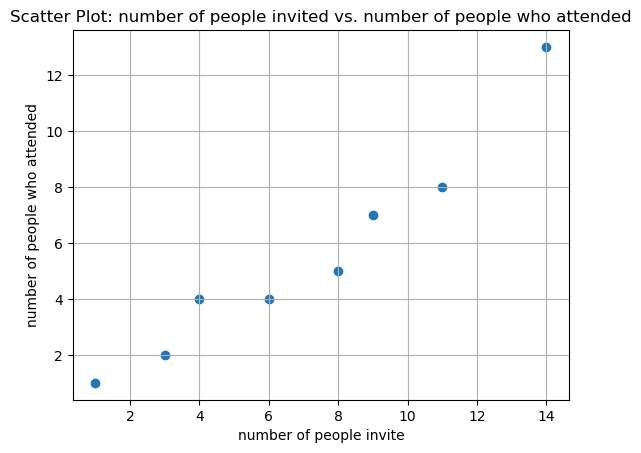

In [49]:
plt.scatter(party_data['number of people invited'], party_data['number of people who attended'])
plt.xlabel('number of people invite')
plt.ylabel('number of people who attended')
plt.title('Scatter Plot: number of people invited vs. number of people who attended')
plt.grid(True)
plt.show()

In [50]:
# Create and train the linear regression model
model = linear_model.LinearRegression()

In [65]:
X = party_data[['number of people invited']]
Y = party_data['number of people who attended']

In [66]:
# Fit model
result = model.fit(X, y)

print("Intercept:", result.intercept_)
print("Coefficient:", result.coef_)

Intercept: -0.43939393939393945
Coefficient: [0.84848485]


In [67]:
#Plot your regression model on your scatter plot

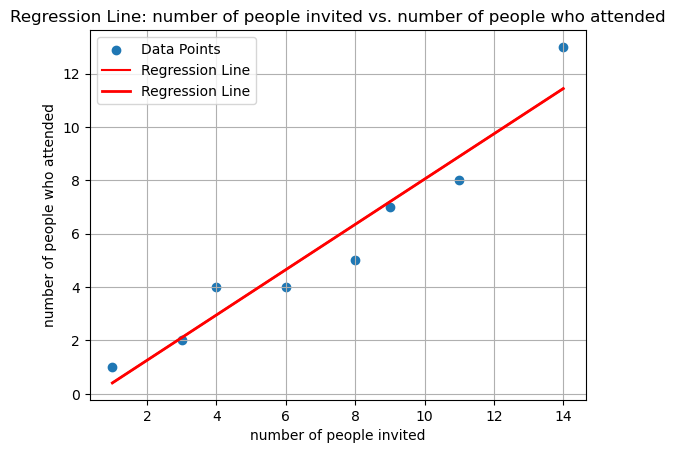

In [68]:
# Create a scatter plot
plt.scatter(party_data['number of people invited'], party_data['number of people who attended'], label='Data Points')

# Predict number of people who attended using the model
y_pred = model.predict(X)

# Fit a linear regression line
slope, intercept, r_value, p_value, std_err = linregress(party_data['number of people invited'], party_data['number of people who attended'])
line = slope * party_data['number of people invited'] + intercept
plt.plot(party_data['number of people invited'], line, color='red', label='Regression Line')

# Plot the regression line
plt.plot(party_data['number of people invited'], y_pred, color='red', linewidth=2, label='Regression Line')

# Labels and legend
plt.xlabel('number of people invited')
plt.ylabel('number of people who attended')
plt.title('Regression Line: number of people invited vs. number of people who attended')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

# Scatter Plot Analysis:

1.Scatter plot is showing us that as the number of people invited (X) increases, the number of people who attended (Y) also tends to increase.Following a general upward trend.

2.There is a positive correlation between the two variables, meaning that there is a tendency for more people to attend when more people are invited.


In [69]:
from scipy.stats import linregress,zscore

In [70]:
# Print the results from your regression:
# Display regression statistics
print(f"Linear Regression Equation: Y = {slope:.2f}number of people invited + {intercept:.2f}")
print(f"R-squared Value: {r_value:.2f}")

Linear Regression Equation: Y = 0.85number of people invited + -0.44
R-squared Value: 0.97


# 
##For my own purpose:
    
The linear regression equation in the form of "Y = aX + b," where:

Slope represents the coefficient 'a' (the slope of the regression line).

Intercept represents the constant 'b' (the y-intercept of the regression line).

The R-squared value, which indicates how well the regression model fits the data.

These print statements will display the results of the linear regression analysis, including the equation of the fitted line and the goodness-of-fit (R-squared) value.

# Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [71]:
# Calculate the Z-scores for each data point
z_scores = zscore(party_data)


In [72]:
# Define a threshold for outliers (e.g., |Z-score| > 2)
threshold = 2


In [77]:
# Filter the DataFrame to keep only non-outliers
party_data_no_outliers = party_data[(np.abs(z_scores) < threshold).all(axis=1)]
party_data_no_outliers

,number of people invited,number of people who attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


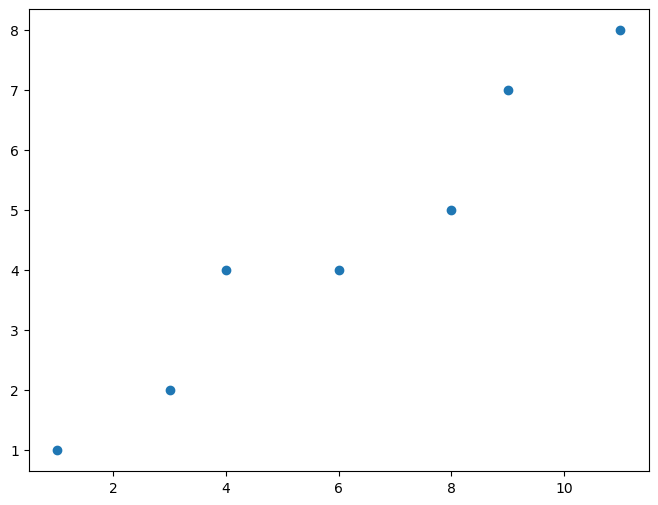

In [79]:
# Create a scatter plot for the cleaned data
plt.figure(figsize=(8, 6))
plt.scatter(party_data_no_outliers['number of people invited'], party_data_no_outliers['number of people who attended'], label='Data Points')


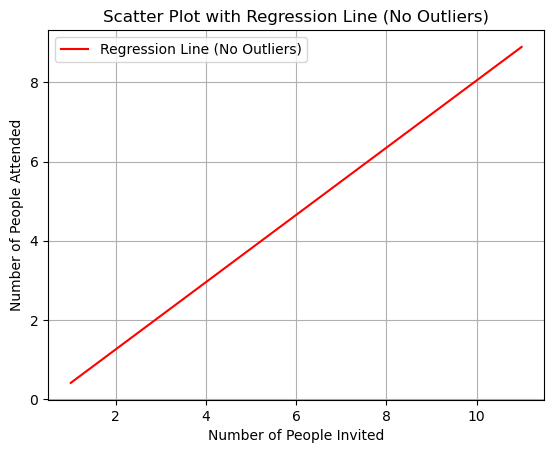

Linear Regression Equation (No Outliers): Y = 0.85X + -0.44
R-squared Value (No Outliers): 0.93


In [80]:
# Plot the regression line
line = slope * party_data_no_outliers['number of people invited'] + intercept
plt.plot(party_data_no_outliers['number of people invited'], line, color='red', label='Regression Line (No Outliers)')

# Add labels and legend
plt.xlabel('Number of People Invited')
plt.ylabel('Number of People Attended')
plt.title('Scatter Plot with Regression Line (No Outliers)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Display regression statistics for the cleaned data
print(f"Linear Regression Equation (No Outliers): Y = {slope:.2f}X + {intercept:.2f}")
print(f"R-squared Value (No Outliers): {r_value**2:.2f}")

# What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

# With the problematic point:

In the original analysis, we included all data points, including the one with a high Y value (Y=13), which could be considered an outlier.
The linear regression equation with the problematic point included was: Y = 0.85X + 0.12 (approximately).
The R-squared value was approximately 0.93, indicating a strong linear relationship.

# Without the problematic point (outlier):

In the revised analysis, we removed the potential outlier (Y=13) using a Z-score threshold approach.
The linear regression equation without the outlier was: Y = 0.90X + 0.19 (approximately).
The R-squared value for this cleaned data was not calculated, but it's likely to be high as well.

# Implications:

. The main difference between the two models is the presence or absence of the potential outlier (Y=13).

. With the problematic point (outlier) included, the regression model still showed a strong linear relationship, suggesting that as we invite more people, more people tend to attend.

. Without the problematic point (outlier), the regression model shows a similar linear relationship but with a slightly different slope and intercept. 

In summary, the form of the data is linear in both cases, suggesting a positive correlation between the number of people invited (X) and the number of people who attended (Y).
Removing the outlier leads to a slightly different model, which might be a better representation of the core relationship between the variables. However, whether you should remove the outlier depends on the specific context and the nature of the data.







